##### import libary

In [1]:
import pandas as pd
import utility_embedding
import importlib
import pysam
# importlib.reload(utility_embedding)

##### Read human fasta file

In [2]:
file_path_human = "../data/GCF_000001405.40_GRCh38.p14_genomic.fna"

In [ ]:
# genome = pysam.Fastafile(file_path_human)

##### Read snp data from vcf file

In [44]:
vcf_file = pysam.VariantFile('../data/GRCh38_latest_clinvar.vcf')

chromosomes, positions, refs, alts,  clndn_info, clnsig_info, clnvc_info, disease, gene  = [], [], [], [], [], [], [], [], []

for record in vcf_file.fetch():
    # Access the variant information
    chromosomes.append(record.chrom)
    positions.append(record.pos)
    refs.append(record.ref)
    alts.append(record.alts)

    clndn_info.append(record.info.get('CLNDN'))
    clnsig_info.append(record.info.get('CLNSIG'))
    clnvc_info.append(record.info.get('CLNVC'))

vcf_file.close()

data = {
    'Chromosome': chromosomes,
    'Position': positions,
    'Ref': refs,
    'Alt': alts,
    'CLNDN': clndn_info,
    'CLNSIG': clnsig_info,
    'CLNVC' : clnvc_info}


df = pd.DataFrame(data) #Store the vcf data without flank
df['Alt'] = df['Alt'].apply(lambda x: x[0] if x is not None else None)
df['CLNSIG'] = df['CLNSIG'].apply(lambda x: x[0] if x is not None else None)
df['CLNDN'] = df['CLNDN'].apply(lambda x: x[0] if x is not None else None)
df['Chromosome'] = df['Chromosome'].astype(str)

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)


In [47]:
df

,Chromosome,Position,Ref,Alt,CLNDN,CLNSIG,CLNVC
0,1,69134,A,G,Inborn_genetic_diseases,Likely_benign,single_nucleotide_variant
1,1,69581,C,G,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant
2,1,69682,G,A,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant
3,1,69769,T,C,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant
4,1,69995,G,C,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant
...,...,...,...,...,...,...,...
552319,4,78432601,C,T,not_provided|Fraser_syndrome_1,Likely_benign,single_nucleotide_variant
552320,4,78432602,G,A,not_provided,Uncertain_significance,single_nucleotide_variant
552321,4,78438550,C,A,not_provided,Benign,single_nucleotide_variant
552322,4,78438561,C,T,Fraser_syndrome_1,Uncertain_significance,single_nucleotide_variant


In [5]:
df["CLNSIG"].value_counts()

CLNSIG
Uncertain_significance                                              259618
Likely_benign                                                       157745
Benign                                                               45183
Pathogenic                                                           30109
Conflicting_interpretations_of_pathogenicity                         26278
Likely_pathogenic                                                    17506
Benign/Likely_benign                                                  8631
Pathogenic/Likely_pathogenic                                          4836
not_provided                                                          1595
drug_response                                                          170
risk_factor                                                            121
association                                                            118
Uncertain_significance/Uncertain_risk_allele                            52
other             

##### Add chromosome id in the dataframe

In [6]:
import utility_embedding
df_with_chr_id = utility_embedding.return_gene_number_v38(df)

In [7]:
df_with_chr_id['Chromosome'] = 'chr' + df_with_chr_id['Chromosome'].astype(str)

In [8]:
df_with_chr_id

,Chromosome,Position,Ref,Alt,CLNDN,CLNSIG,CLNVC,Chr
0,chr1,69134,A,G,Inborn_genetic_diseases,Likely_benign,single_nucleotide_variant,NC_000001.11
1,chr1,69581,C,G,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
2,chr1,69682,G,A,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
3,chr1,69769,T,C,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
4,chr1,69995,G,C,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
...,...,...,...,...,...,...,...,...
552319,chr4,78432601,C,T,not_provided|Fraser_syndrome_1,Likely_benign,single_nucleotide_variant,NC_000004.12
552320,chr4,78432602,G,A,not_provided,Uncertain_significance,single_nucleotide_variant,NC_000004.12
552321,chr4,78438550,C,A,not_provided,Benign,single_nucleotide_variant,NC_000004.12
552322,chr4,78438561,C,T,Fraser_syndrome_1,Uncertain_significance,single_nucleotide_variant,NC_000004.12


##### Read flank data

In [10]:
df_flank = pd.read_table("../data/clinvar-vcf-flanks.txt")
df_flank.columns = ['Position',  'Ref', 'Alt', 'Chromosome', 'Type', 'start', 'end', 'upstream', 'downstream']

In [11]:
df_flank["Ref seq"] = df_flank["upstream"] + df_flank["Ref"] + df_flank["downstream"]
df_flank["Alt seq"] =df_flank["upstream"] + df_flank["Alt"] + df_flank["downstream"]
# df_with_chr_id['Chromosome'] = 'chr' + df_with_chr_id['Chromosome'].astype(str)

In [ ]:
# df_flank_with_chr_id = utility_embedding.return_gene_number_v38(df_flank)

In [15]:
df_flank

,Position,Ref,Alt,Chromosome,Type,start,end,upstream,downstream,Ref seq,Alt seq
0,69134,A,G,chr1,S,69134,69134,GATTCTCAGG,ACTCCAGACC,GATTCTCAGGAACTCCAGACC,GATTCTCAGGGACTCCAGACC
1,69581,C,G,chr1,S,69581,69581,TTCTGTGGTC,CAATGAGGTC,TTCTGTGGTCCCAATGAGGTC,TTCTGTGGTCGCAATGAGGTC
2,69682,G,A,chr1,S,69682,69682,TAACAGTGGT,TGCTCACTGT,TAACAGTGGTGTGCTCACTGT,TAACAGTGGTATGCTCACTGT
3,69769,T,C,chr1,S,69769,69769,AGATAAGTCG,CCAAAGCTCT,AGATAAGTCGTCCAAAGCTCT,AGATAAGTCGCCCAAAGCTCT
4,69995,G,C,chr1,S,69995,69995,GCACATTCTA,TGTAAAGTTT,GCACATTCTAGTGTAAAGTTT,GCACATTCTACTGTAAAGTTT
...,...,...,...,...,...,...,...,...,...,...,...
2049622,12915989,A,AT,chrY,S,12915989,12915989,GAAGACTTAG,TAAACGGTCA,GAAGACTTAGATAAACGGTCA,GAAGACTTAGATTAAACGGTCA
2049623,14622379,G,A,chrY,S,14622379,14622379,GGAGAGAGGC,GTTTCAGCCA,GGAGAGAGGCGGTTTCAGCCA,GGAGAGAGGCAGTTTCAGCCA
2049624,14824201,C,T,chrY,S,14824201,14824201,TTTTAAGTAC,GGTGACCAGG,TTTTAAGTACCGGTGACCAGG,TTTTAAGTACTGGTGACCAGG
2049625,14830121,C,A,chrY,S,14830121,14830121,CCGTGTCCAA,TTCGTGGACA,CCGTGTCCAACTTCGTGGACA,CCGTGTCCAAATTCGTGGACA


In [ ]:
# df_with_chr_id

##### Merge flank and main data

In [12]:
df_merge = pd.merge(df_flank, df_with_chr_id,  on = ["Position", 'Chromosome', "Ref", "Alt"], how ="left")
df_merge

,Position,Ref,Alt,Chromosome,Type,start,end,upstream,downstream,Ref seq,Alt seq,CLNDN,CLNSIG,CLNVC,Chr
0,69134,A,G,chr1,S,69134,69134,GATTCTCAGG,ACTCCAGACC,GATTCTCAGGAACTCCAGACC,GATTCTCAGGGACTCCAGACC,Inborn_genetic_diseases,Likely_benign,single_nucleotide_variant,NC_000001.11
1,69581,C,G,chr1,S,69581,69581,TTCTGTGGTC,CAATGAGGTC,TTCTGTGGTCCCAATGAGGTC,TTCTGTGGTCGCAATGAGGTC,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
2,69682,G,A,chr1,S,69682,69682,TAACAGTGGT,TGCTCACTGT,TAACAGTGGTGTGCTCACTGT,TAACAGTGGTATGCTCACTGT,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
3,69769,T,C,chr1,S,69769,69769,AGATAAGTCG,CCAAAGCTCT,AGATAAGTCGTCCAAAGCTCT,AGATAAGTCGCCCAAAGCTCT,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
4,69995,G,C,chr1,S,69995,69995,GCACATTCTA,TGTAAAGTTT,GCACATTCTAGTGTAAAGTTT,GCACATTCTACTGTAAAGTTT,Inborn_genetic_diseases,Uncertain_significance,single_nucleotide_variant,NC_000001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049622,12915989,A,AT,chrY,S,12915989,12915989,GAAGACTTAG,TAAACGGTCA,GAAGACTTAGATAAACGGTCA,GAAGACTTAGATTAAACGGTCA,NaN,NaN,NaN,NaN
2049623,14622379,G,A,chrY,S,14622379,14622379,GGAGAGAGGC,GTTTCAGCCA,GGAGAGAGGCGGTTTCAGCCA,GGAGAGAGGCAGTTTCAGCCA,NaN,NaN,NaN,NaN
2049624,14824201,C,T,chrY,S,14824201,14824201,TTTTAAGTAC,GGTGACCAGG,TTTTAAGTACCGGTGACCAGG,TTTTAAGTACTGGTGACCAGG,NaN,NaN,NaN,NaN
2049625,14830121,C,A,chrY,S,14830121,14830121,CCGTGTCCAA,TTCGTGGACA,CCGTGTCCAACTTCGTGGACA,CCGTGTCCAAATTCGTGGACA,NaN,NaN,NaN,NaN


##### Drop nan rows and reset index

In [13]:
df_merge.dropna(inplace=True)
df_merge.reset_index(inplace=True, drop = True)
df_merge.shape

(521194, 15)

In [14]:
df_merge["CLNSIG"].value_counts()

CLNSIG
Uncertain_significance                                              252313
Likely_benign                                                       153745
Benign                                                               41978
Conflicting_interpretations_of_pathogenicity                         25561
Pathogenic                                                           19954
Likely_pathogenic                                                    13460
Benign/Likely_benign                                                  8329
Pathogenic/Likely_pathogenic                                          3874
not_provided                                                          1375
drug_response                                                          151
association                                                            115
risk_factor                                                            106
Uncertain_significance/Uncertain_risk_allele                            52
other             

##### select the sample which are "Uncertain_significance" or "Pathogenic" in the column "CLNSIG"

In [16]:
df_merge_int = df_merge[(df_merge.loc[:, "CLNSIG"].isin(["Benign", "Pathogenic"]))]
df_merge_int.reset_index(inplace=True, drop=True)
df_merge_int

,Position,Ref,Alt,Chromosome,Type,start,end,upstream,downstream,Ref seq,Alt seq,CLNDN,CLNSIG,CLNVC,Chr
0,930165,G,A,chr1,S,930165,930165,AACCGGGGGC,GCTGGCAGAC,AACCGGGGGCGGCTGGCAGAC,AACCGGGGGCAGCTGGCAGAC,not_provided,Benign,single_nucleotide_variant,NC_000001.11
1,930204,G,A,chr1,S,930204,930204,CCTGCCGCCC,GAACCTGAAG,CCTGCCGCCCGGAACCTGAAG,CCTGCCGCCCAGAACCTGAAG,not_provided,Benign,single_nucleotide_variant,NC_000001.11
2,930285,G,A,chr1,S,930285,930285,TGTGGGCGGC,GCCAGGCTTG,TGTGGGCGGCGGCCAGGCTTG,TGTGGGCGGCAGCCAGGCTTG,not_provided,Benign,single_nucleotide_variant,NC_000001.11
3,930314,C,T,chr1,S,930314,930314,GGATGGTCCG,ACATCCGTAT,GGATGGTCCGCACATCCGTAT,GGATGGTCCGTACATCCGTAT,not_provided,Benign,single_nucleotide_variant,NC_000001.11
4,930325,C,T,chr1,S,930325,930325,ACATCCGTAT,ATGAAGAGAA,ACATCCGTATCATGAAGAGAA,ACATCCGTATTATGAAGAGAA,not_provided,Benign,single_nucleotide_variant,NC_000001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61927,78430325,C,T,chr4,S,78430325,78430325,GCTGAGACAG,GCCCAAAGAA,GCTGAGACAGCGCCCAAAGAA,GCTGAGACAGTGCCCAAAGAA,not_provided|not_specified,Benign,single_nucleotide_variant,NC_000004.12
61928,78430426,A,C,chr4,S,78430426,78430426,AGGTAGCTAC,CACCTACACA,AGGTAGCTACACACCTACACA,AGGTAGCTACCCACCTACACA,not_provided|Fraser_syndrome_1,Benign,single_nucleotide_variant,NC_000004.12
61929,78432521,C,T,chr4,S,78432521,78432521,CCGAGGGCCT,GACTGGCTGC,CCGAGGGCCTCGACTGGCTGC,CCGAGGGCCTTGACTGGCTGC,Fraser_syndrome_1,Pathogenic,single_nucleotide_variant,NC_000004.12
61930,78432595,T,C,chr4,S,78432595,78432595,GGTCACACCT,GCTTACGTGG,GGTCACACCTTGCTTACGTGG,GGTCACACCTCGCTTACGTGG,Fraser_syndrome_1|not_provided,Benign,single_nucleotide_variant,NC_000004.12


##### Choose only snp variant of mutant

In [17]:
df_merge_int_snp = df_merge_int[df_merge_int.loc[:, "CLNVC"]=="single_nucleotide_variant"]
df_merge_int_snp.reset_index(inplace=True, drop = True)
df_merge_int_snp

,Position,Ref,Alt,Chromosome,Type,start,end,upstream,downstream,Ref seq,Alt seq,CLNDN,CLNSIG,CLNVC,Chr
0,930165,G,A,chr1,S,930165,930165,AACCGGGGGC,GCTGGCAGAC,AACCGGGGGCGGCTGGCAGAC,AACCGGGGGCAGCTGGCAGAC,not_provided,Benign,single_nucleotide_variant,NC_000001.11
1,930204,G,A,chr1,S,930204,930204,CCTGCCGCCC,GAACCTGAAG,CCTGCCGCCCGGAACCTGAAG,CCTGCCGCCCAGAACCTGAAG,not_provided,Benign,single_nucleotide_variant,NC_000001.11
2,930285,G,A,chr1,S,930285,930285,TGTGGGCGGC,GCCAGGCTTG,TGTGGGCGGCGGCCAGGCTTG,TGTGGGCGGCAGCCAGGCTTG,not_provided,Benign,single_nucleotide_variant,NC_000001.11
3,930314,C,T,chr1,S,930314,930314,GGATGGTCCG,ACATCCGTAT,GGATGGTCCGCACATCCGTAT,GGATGGTCCGTACATCCGTAT,not_provided,Benign,single_nucleotide_variant,NC_000001.11
4,930325,C,T,chr1,S,930325,930325,ACATCCGTAT,ATGAAGAGAA,ACATCCGTATCATGAAGAGAA,ACATCCGTATTATGAAGAGAA,not_provided,Benign,single_nucleotide_variant,NC_000001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54775,78430325,C,T,chr4,S,78430325,78430325,GCTGAGACAG,GCCCAAAGAA,GCTGAGACAGCGCCCAAAGAA,GCTGAGACAGTGCCCAAAGAA,not_provided|not_specified,Benign,single_nucleotide_variant,NC_000004.12
54776,78430426,A,C,chr4,S,78430426,78430426,AGGTAGCTAC,CACCTACACA,AGGTAGCTACACACCTACACA,AGGTAGCTACCCACCTACACA,not_provided|Fraser_syndrome_1,Benign,single_nucleotide_variant,NC_000004.12
54777,78432521,C,T,chr4,S,78432521,78432521,CCGAGGGCCT,GACTGGCTGC,CCGAGGGCCTCGACTGGCTGC,CCGAGGGCCTTGACTGGCTGC,Fraser_syndrome_1,Pathogenic,single_nucleotide_variant,NC_000004.12
54778,78432595,T,C,chr4,S,78432595,78432595,GGTCACACCT,GCTTACGTGG,GGTCACACCTTGCTTACGTGG,GGTCACACCTCGCTTACGTGG,Fraser_syndrome_1|not_provided,Benign,single_nucleotide_variant,NC_000004.12


In [18]:
df_merge_int_snp[df_merge_int_snp.duplicated(subset = ["Chromosome", "Position"])]

,Position,Ref,Alt,Chromosome,Type,start,end,upstream,downstream,Ref seq,Alt seq,CLNDN,CLNSIG,CLNVC,Chr
10,935835,C,T,chr1,S,935835,935835,TCGTTATGCC,GAGCATCAGA,TCGTTATGCCCGAGCATCAGA,TCGTTATGCCTGAGCATCAGA,not_provided,Benign,single_nucleotide_variant,NC_000001.11
179,1050658,G,C,chr1,S,1050658,1050658,CCAGCAGGTC,CTCAGGCCCT,CCAGCAGGTCGCTCAGGCCCT,CCAGCAGGTCCCTCAGGCCCT,not_provided,Benign,single_nucleotide_variant,NC_000001.11
294,1340399,C,T,chr1,S,1340399,1340399,CTGCTCCACC,GGCTGCCTAC,CTGCTCCACCCGGCTGCCTAC,CTGCTCCACCTGGCTGCCTAC,not_provided,Benign,single_nucleotide_variant,NC_000001.11
303,1341803,C,T,chr1,S,1341803,1341803,TTGGTCCGGG,GGCTGTGGGG,TTGGTCCGGGCGGCTGTGGGG,TTGGTCCGGGTGGCTGTGGGG,not_provided,Benign,single_nucleotide_variant,NC_000001.11
362,1535722,C,T,chr1,S,1535722,1535722,TCACACTGTC,GTCACAAAGT,TCACACTGTCCGTCACAAAGT,TCACACTGTCTGTCACAAAGT,not_provided,Benign,single_nucleotide_variant,NC_000001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53970,54277981,C,G,chr4,S,54277981,54277981,ACATTGTAAA,TTGCTGGGAG,ACATTGTAAACTTGCTGGGAG,ACATTGTAAAGTTGCTGGGAG,Gastrointestinal_stromal_tumor,Pathogenic,single_nucleotide_variant,NC_000004.12
54044,54727418,A,T,chr4,S,54727418,54727418,CCCCACAGAA,CCCATGTATG,CCCCACAGAAACCCATGTATG,CCCCACAGAATCCCATGTATG,Melanoma,Pathogenic,single_nucleotide_variant,NC_000004.12
54069,54733166,G,T,chr4,S,54733166,54733166,CATCAAGAAT,ATTCTAATTA,CATCAAGAATGATTCTAATTA,CATCAAGAATTATTCTAATTA,Melanoma,Pathogenic,single_nucleotide_variant,NC_000004.12
54265,56910912,G,T,chr4,S,56910912,56910912,AGAAGGAGAA,GACTTGAAGA,AGAAGGAGAAGGACTTGAAGA,AGAAGGAGAATGACTTGAAGA,not_provided,Pathogenic,single_nucleotide_variant,NC_000004.12


##### Uppercase the reference column

In [19]:
df_merge_int_snp["Ref"] = df_merge_int_snp["Ref"].str.upper()

/tmp/ipykernel_678462/2700717284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_int_snp["Ref"] = df_merge_int_snp["Ref"].str.upper()


In [ ]:
df_merge_int_snp

##### Define parameter for FCGR representation

In [20]:
import kaos
kmer_length = 10

##### Obtain the kmer key matrix

In [21]:
chaos_game_kmer_array = kaos.kaos_fcgr().chaos_game_representation_key(kmer_length=kmer_length)

##### Obtain probabilistic frequency of each kmer in dictinary form

In [22]:
fcgr_prob_dict = kaos.kaos_fcgr().chaos_probabilistic_frequency_dictionary(fasta_string= kaos.Read().read_fasta_removing_non_atgc(file_path_human), kmer_length = kmer_length,  pseudo_count = True)

In [ ]:
# df_merge_int_snp["ref1"] = df_merge_int_snp["ref1"].str.upper()
# for i in range(df_merge_int_snp.shape[0]):
#     if df_merge_int_snp.loc[i, "Ref"] != df_merge_int_snp.loc[i, "ref1"]:
#         print(i, df_merge_int_snp.loc[i, "Ref"], df_merge_int_snp.loc[i, "ref1"])

In [ ]:
# df_merge_int_snp["Ref"].equals(df_merge_int_snp["ref1"])

##### Obtain the log likelihood gain

In [23]:
import pandas as pd
import numpy as np

rows = []

for i in range(df_merge_int_snp.shape[0]):

    ref_seq = df_merge_int_snp.loc[i, "Ref seq"]
    alt_seq = df_merge_int_snp.loc[i, "Alt seq"]
    center_pos = int(len(ref_seq) / 2)
    
    if not (set(list(set(list(ref_seq)))).issubset(['G', 'T', 'A', 'C'])):
        continue
    if not (set(list(set(list(alt_seq)))).issubset(['G', 'T', 'A', 'C'])):
        continue     
    
    
    # print(i)

    for j in range(kmer_length):
        altered_allele = alt_seq[center_pos - kmer_length + j + 1:center_pos + 1 + j]
        reference_allele = ref_seq[center_pos - kmer_length + j + 1:center_pos + j + 1]

        rows.append({
            'altered allete': altered_allele,
            'reference allele': reference_allele,
            'gain': np.log(fcgr_prob_dict[altered_allele] / fcgr_prob_dict[reference_allele]),
            'Position': df_merge_int_snp.loc[i, 'Position'],
            'Ref': df_merge_int_snp.loc[i, 'Ref'],
            'Alt': df_merge_int_snp.loc[i, 'Alt'],
            'CLNSIG': df_merge_int_snp.loc[i, 'CLNSIG'],
            'Chromosome': df_merge_int_snp.loc[i, 'Chromosome'],
        })
        
    del altered_allele, reference_allele, ref_seq, alt_seq, center_pos
        
#     if(i==240000):
#         break


df_complete = pd.DataFrame(rows) ##### It contains gain of each sliding window for each snp



In [24]:
df_complete["CLNSIG"].value_counts()

CLNSIG
Benign        391720
Pathogenic    156080
Name: count, dtype: int64

In [25]:
df_complete

,altered allete,reference allele,gain,Position,Ref,Alt,CLNSIG,Chromosome
0,ACCGGGGGCA,ACCGGGGGCG,0.482612,930165,G,A,Benign,chr1
1,CCGGGGGCAG,CCGGGGGCGG,-0.005496,930165,G,A,Benign,chr1
2,CGGGGGCAGC,CGGGGGCGGC,0.055680,930165,G,A,Benign,chr1
3,GGGGGCAGCT,GGGGGCGGCT,1.138045,930165,G,A,Benign,chr1
4,GGGGCAGCTG,GGGGCGGCTG,-0.097696,930165,G,A,Benign,chr1
...,...,...,...,...,...,...,...,...
547795,CCTGACTCAT,CCTGCCTCAT,-0.671073,78438550,C,A,Benign,chr4
547796,CTGACTCATG,CTGCCTCATG,-0.365908,78438550,C,A,Benign,chr4
547797,TGACTCATGT,TGCCTCATGT,-0.086965,78438550,C,A,Benign,chr4
547798,GACTCATGTT,GCCTCATGTT,-0.162320,78438550,C,A,Benign,chr4


##### Obtain accumulated gain

In [26]:
grouped_df_with_accumulated = df_complete.groupby(["Position", 'Chromosome', 'Ref','Alt']).agg({'gain':'sum'}).reset_index()
grouped_df_with_accumulated.rename(columns={'gain': 'accumulate_gain'}, inplace=True)
grouped_df_with_accumulated

,Position,Chromosome,Ref,Alt,accumulate_gain
0,45695,chr2,C,G,-1.986703
1,45696,chr2,C,G,-17.257536
2,264985,chr2,G,T,0.754963
3,265015,chr2,G,A,-1.003223
4,265017,chr2,C,T,9.637417
...,...,...,...,...,...
54775,248273336,chr1,A,G,-1.858893
54776,248453107,chr1,C,T,-0.688242
54777,248453117,chr1,C,A,-0.134069
54778,248488626,chr1,A,G,-3.965299


##### Merge accumulated gain dataframe with the df_complete dataframe

In [27]:
df_complete = pd.merge(df_complete, grouped_df_with_accumulated, on=["Position", 'Chromosome', 'Ref','Alt'], how='left')
df_complete

,altered allete,reference allele,gain,Position,Ref,Alt,CLNSIG,Chromosome,accumulate_gain
0,ACCGGGGGCA,ACCGGGGGCG,0.482612,930165,G,A,Benign,chr1,4.601477
1,CCGGGGGCAG,CCGGGGGCGG,-0.005496,930165,G,A,Benign,chr1,4.601477
2,CGGGGGCAGC,CGGGGGCGGC,0.055680,930165,G,A,Benign,chr1,4.601477
3,GGGGGCAGCT,GGGGGCGGCT,1.138045,930165,G,A,Benign,chr1,4.601477
4,GGGGCAGCTG,GGGGCGGCTG,-0.097696,930165,G,A,Benign,chr1,4.601477
...,...,...,...,...,...,...,...,...,...
547795,CCTGACTCAT,CCTGCCTCAT,-0.671073,78438550,C,A,Benign,chr4,-6.935569
547796,CTGACTCATG,CTGCCTCATG,-0.365908,78438550,C,A,Benign,chr4,-6.935569
547797,TGACTCATGT,TGCCTCATGT,-0.086965,78438550,C,A,Benign,chr4,-6.935569
547798,GACTCATGTT,GCCTCATGTT,-0.162320,78438550,C,A,Benign,chr4,-6.935569


/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


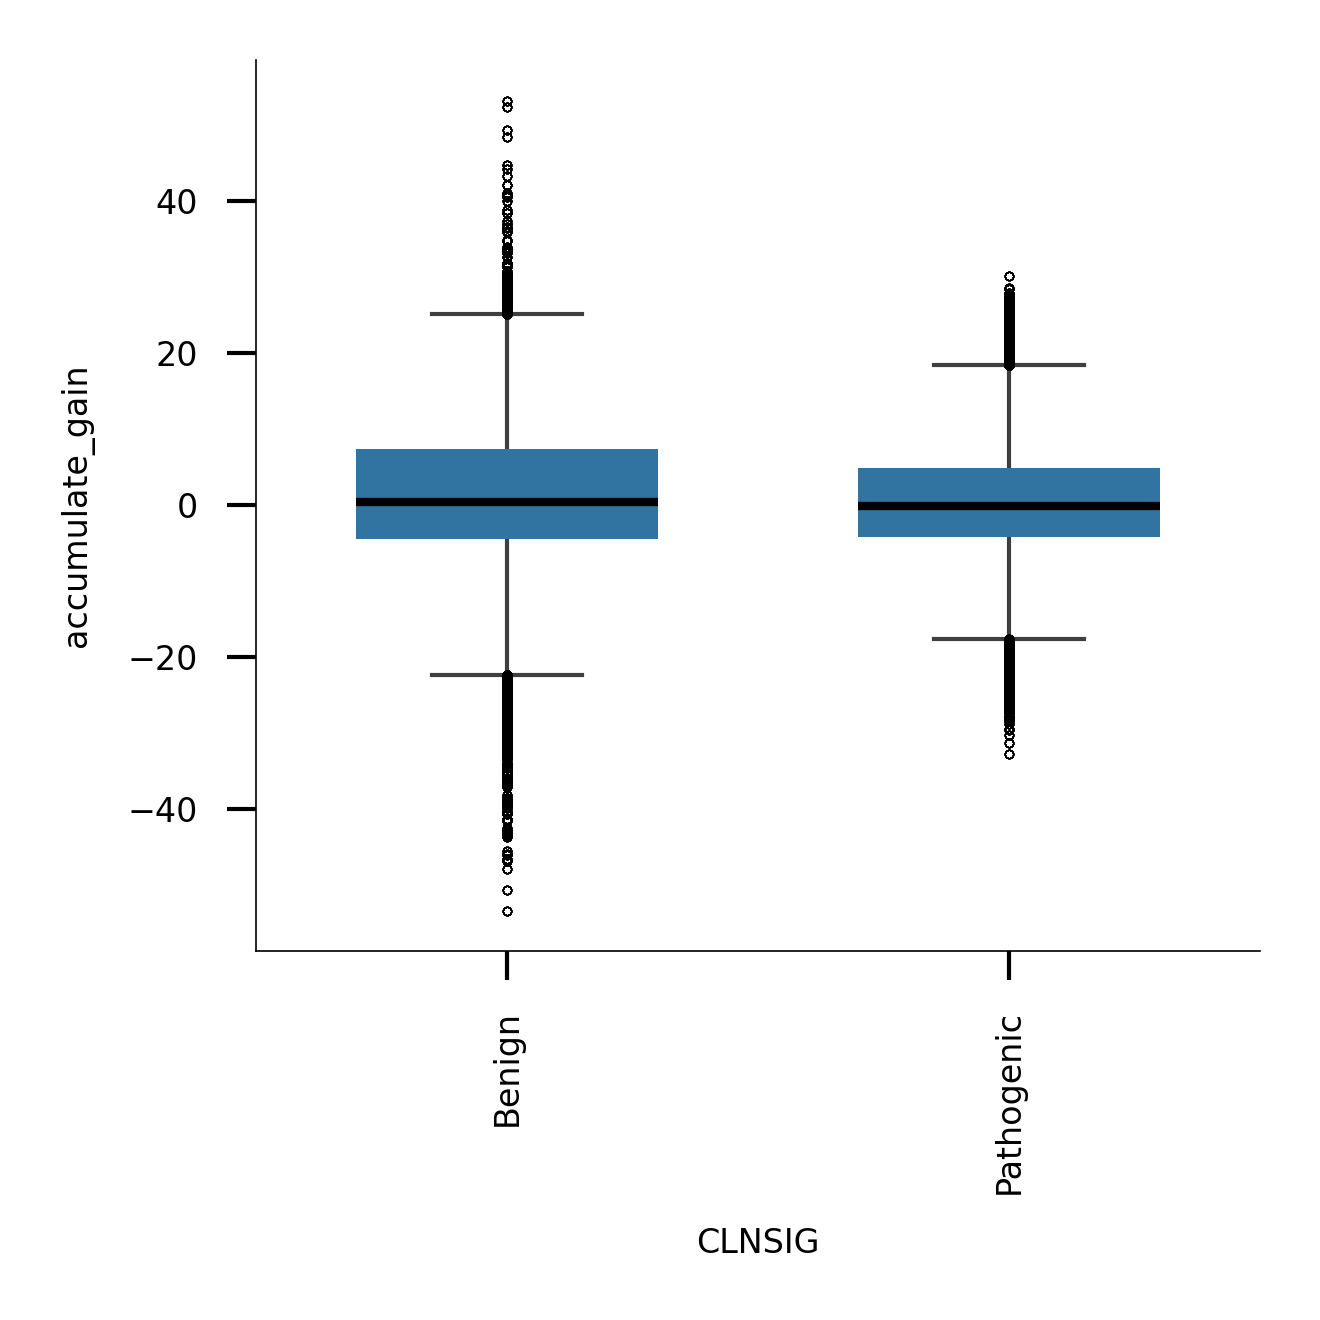

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import utility
ig, ax = plt.subplots(1, 1, figsize=(2.3, 2.3), dpi=600)
sns.boxplot(df_complete, x = "CLNSIG", y="accumulate_gain", ax=ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.6,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1})
ax = utility.custom_figure_axis(ax, fontsize=4, show_ticks = True)
plt.tight_layout()
plt.savefig("Clinvar AG vs type.pdf", dpi = 600)

# Coding Vs Non coding region 

#### Code script is -/home/bernadettem/bernadettenotebook/human_ref_genome/Clinvar_new_analysis/map to exon /clinvar_processing_script

In [36]:
# Read the output after mapping the variants to the region 
import pandas as pd 
df_region = pd.read_excel("../data/merged_output.xlsx")

In [37]:
df_region

,altered allete,reference allele,gain,Position,Ref,Alt,CLNSIG,Chromosome,accumulate_gain,Seqid,Source,Type,Start,End,Score,Strand,Phase,Attributes
0,TCCCCAGGGG,TCCCCAGGGC,-0.315565,45695,C,G,Pathogenic,chr2,-1.986703,NC_000001.11,RefSeq,match,52353,53496,1144,+,.,NaN
1,GCTCCACCAC,CCTCCACCAC,-0.678013,45695,C,G,Pathogenic,chr2,-1.986703,NC_000001.11,RefSeq,match,52353,53496,1144,+,.,NaN
2,GGCTCCACCA,GCCTCCACCA,-0.267485,45695,C,G,Pathogenic,chr2,-1.986703,NC_000001.11,RefSeq,match,52353,53496,1144,+,.,NaN
3,GGGCTCCACC,GGCCTCCACC,0.625608,45695,C,G,Pathogenic,chr2,-1.986703,NC_000001.11,RefSeq,match,52353,53496,1144,+,.,NaN
4,GGGGCTCCAC,GGGCCTCCAC,0.011045,45695,C,G,Pathogenic,chr2,-1.986703,NC_000001.11,RefSeq,match,52353,53496,1144,+,.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,CTTGCCACAG,CTTGCCGCAG,1.854188,248850411,G,A,Benign,chr1,20.150897,NC_000001.11,Gnomon,exon,248850682,248850781,.,-,.,NaN
1048571,GCTTGCCACA,GCTTGCCGCA,2.093626,248850411,G,A,Benign,chr1,20.150897,NC_000001.11,Gnomon,exon,248850682,248850781,.,-,.,NaN
1048572,GCGCTTGCCA,GCGCTTGCCG,1.441171,248850411,G,A,Benign,chr1,20.150897,NC_000001.11,Gnomon,exon,248850682,248850781,.,-,.,NaN
1048573,ACAGAATTCA,GCAGAATTCA,0.276286,248850411,G,A,Benign,chr1,20.150897,NC_000001.11,Gnomon,exon,248850682,248850781,.,-,.,NaN


##### AG vs overall type wise box plot

In [38]:
df_overall_region_df = df_region.copy()
df_overall_region_df["Type"]= df_overall_region_df["Type"].str.strip()

non_coding_list = ['pseudogene', 'lnc_RNA', 'miRNA']
coding_list = ['CDS', 'gene' , 'mRNA', 'protein_binding_site', 'sequence_feature', 'transcript', 'exon']
regulatory_list = ['enhancer', 'meiotic_recombination_region', 'silencer', 'nucleotide_motif',  'transcriptional_cis_regulatory_region', 'regulatory_region', 'promoter']
structural_list = ['centromere']
mobile_elements_list = ['mobile_genetic_element', 'non_allelic_homologous_recombination_region']
functional_regions_list = ['match', 'biological_region']

df_overall_region_df.loc[df_overall_region_df['Type'].isin(non_coding_list), 'variant'] = 'non_coding' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(coding_list), 'variant'] = 'coding' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(regulatory_list), 'variant'] = 'regulatory' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(structural_list), 'variant'] = 'structural' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(mobile_elements_list), 'variant'] = 'mobile_element' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(functional_regions_list), 'variant'] = 'functional' 

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categoric

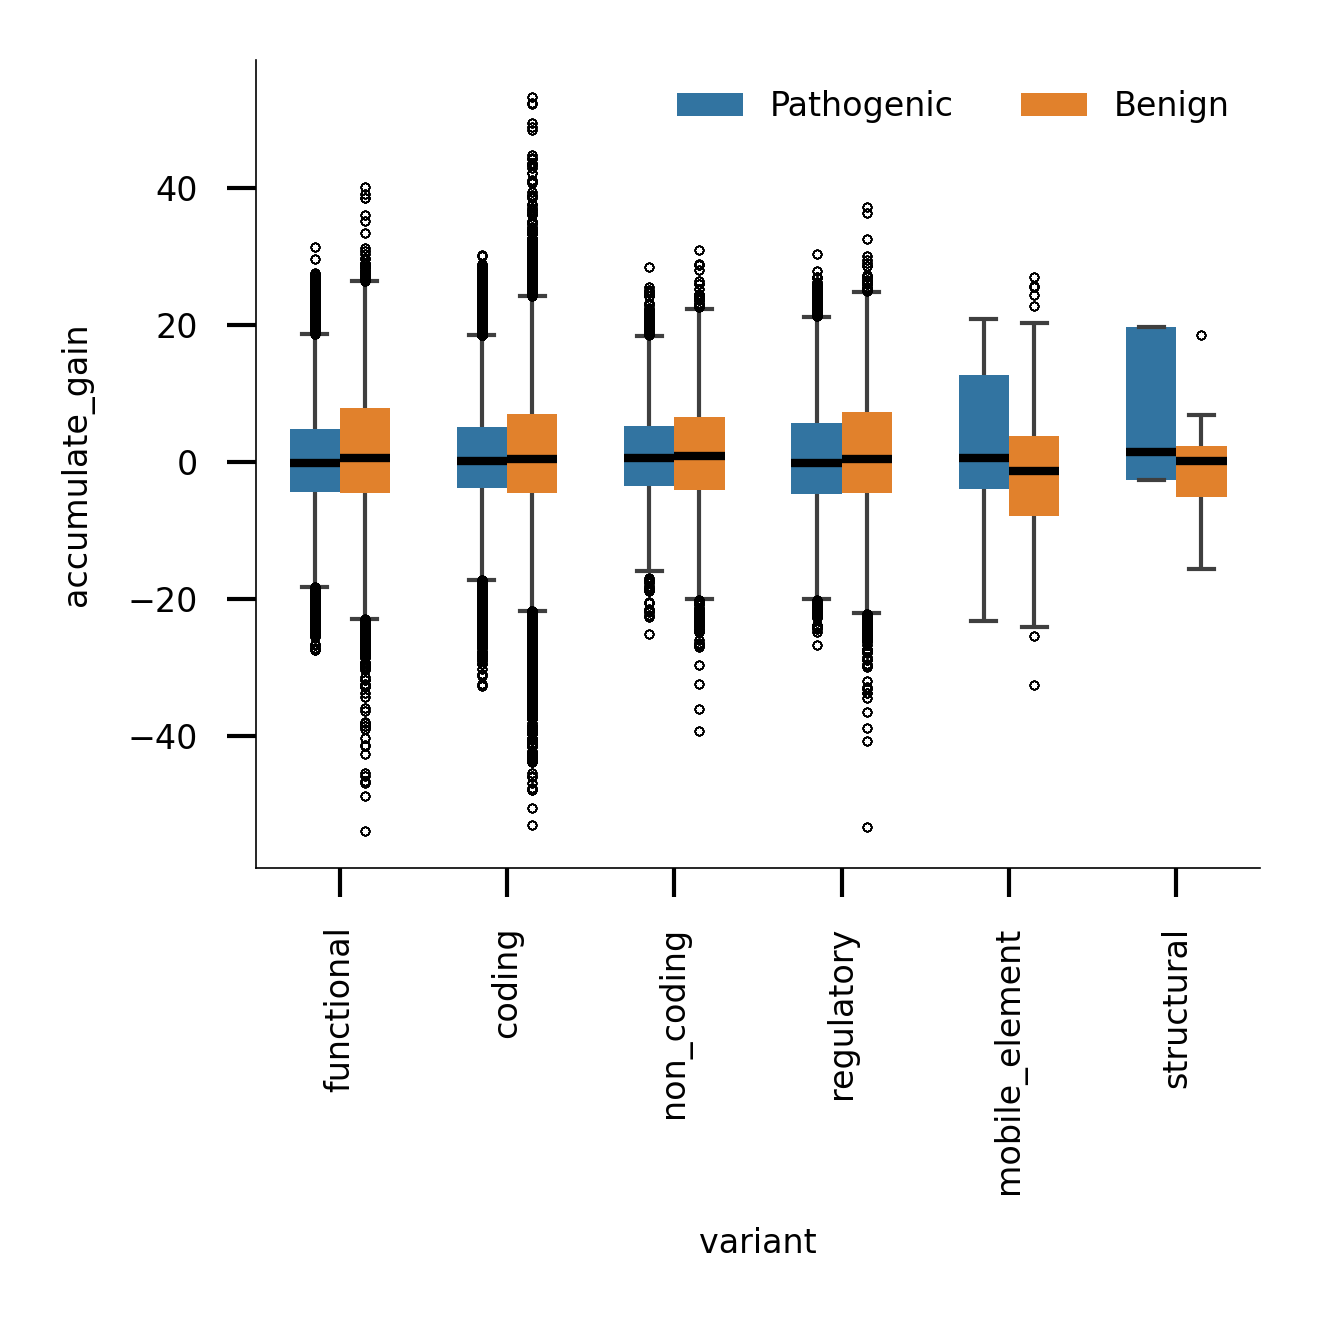

In [39]:
import seaborn as sns
import utility
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(2.3, 2.3), dpi=600)
sns.boxplot(df_overall_region_df, x = "variant", y = "accumulate_gain", hue = "CLNSIG", ax=ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.6,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1})
ax = utility.custom_figure_axis(ax, fontsize=4, show_ticks = True)
ax.legend(ncol=2, fontsize=4, frameon=False)
plt.tight_layout()
# plt.savefig("AG_vs_variant_of_gene.pdf", dpi=600)

##### add variant type in each row

In [40]:
df_overall_region_df.loc[df_overall_region_df['Type'].isin(non_coding_list), 'variant'] = 'non_coding' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(coding_list), 'variant'] = 'coding' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(regulatory_list), 'variant'] = 'regulatory' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(structural_list), 'variant'] = 'structural' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(mobile_elements_list), 'variant'] = 'mobile_element' 
df_overall_region_df.loc[df_overall_region_df['Type'].isin(functional_regions_list), 'variant'] = 'functional' 

##### Kruskal-Wallis H-test across all the sample w.r.t accumulated gain

In [41]:
from scipy import stats
stats.kruskal(df_overall_region_df[df_overall_region_df["variant"].isin(["functional"])]["accumulate_gain"], 
              df_overall_region_df[df_overall_region_df["variant"].isin(["non_coding"])]["accumulate_gain"],
              df_overall_region_df[df_overall_region_df["variant"].isin(["coding"])]["accumulate_gain"],
              df_overall_region_df[df_overall_region_df["variant"].isin(["regulatory"])]["accumulate_gain"],
              df_overall_region_df[df_overall_region_df["variant"].isin(["structural"])]["accumulate_gain"],
              df_overall_region_df[df_overall_region_df["variant"].isin(["mobile_element"])]["accumulate_gain"])

KruskalResult(statistic=46.41978885069269, pvalue=7.45930323257033e-09)

##### Kruskal-Wallis H-test for Pathogenic category across all the sample w.r.t accumulated gain

In [42]:
from scipy import stats
stats.kruskal(df_overall_region_df[(df_overall_region_df["variant"].isin(["functional"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"], 
              df_overall_region_df[(df_overall_region_df["variant"].isin(["coding"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["non_coding"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["regulatory"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["structural"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["mobile_element"])) & (df_overall_region_df["CLNSIG"].isin(["Pathogenic"]))]["accumulate_gain"])

KruskalResult(statistic=136.98209537592442, pvalue=7.834415214518687e-28)

##### Kruskal-Wallis H-test for benign category across all the sample w.r.t accumulated gain

In [43]:
from scipy import stats
stats.kruskal(df_overall_region_df[(df_overall_region_df["variant"].isin(["functional"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"], 
              df_overall_region_df[(df_overall_region_df["variant"].isin(["coding"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["non_coding"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["regulatory"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["structural"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"],
              df_overall_region_df[(df_overall_region_df["variant"].isin(["mobile_element"])) & (df_overall_region_df["CLNSIG"].isin(["Benign"]))]["accumulate_gain"])

KruskalResult(statistic=82.67836823045177, pvalue=2.307746672389625e-16)